# Introducction to Convolutional Neural Networks and Computer Vision with TensforFlow

Computer vision is the practice of writing algorithms which can dsicover patterns in visual data. Such as the camero of a self-driving car recognizing the car in front.

## Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-03-12 16:29:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.207, 172.217.214.207, 142.250.152.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   105MB/s    in 1.0s    

2025-03-12 16:29:35 (105 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

A very crucial step at the beggining of any ML project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} image in '{dirpath}'.")

There are 2 directories and 0 image in 'pizza_steak'.
There are 2 directories and 0 image in 'pizza_steak/train'.
There are 0 directories and 750 image in 'pizza_steak/train/steak'.
There are 0 directories and 750 image in 'pizza_steak/train/pizza'.
There are 2 directories and 0 image in 'pizza_steak/test'.
There are 0 directories and 250 image in 'pizza_steak/test/steak'.
There are 0 directories and 250 image in 'pizza_steak/test/pizza'.


In [ ]:
# Anothjer way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classname programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from subdirectories
print(class_names)

[]


In [1]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_iamge(target_dir,target_class):
  #Set upo the target directory
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib

  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


['625687.jpg']
Image shape: (512, 512, 3)


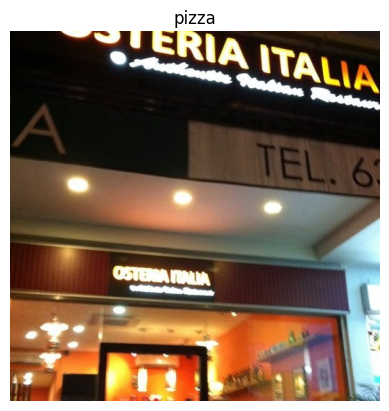

In [ ]:
# View a random image from the training data set

img = view_random_iamge(target_dir="pizza_steak/train/",target_class="pizza")

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.02352941, 0.02745098, 0.00392157],
        [0.02352941, 0.02745098, 0.00392157],
        [0.03137255, 0.02745098, 0.00784314],
        ...,
        [0.12941176, 0.10980392, 0.08627451],
        [0.12941176, 0.10980392, 0.08627451],
        [0.13333333, 0.11372549, 0.09019608]],

       [[0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.02352941, 0.        ],
        [0.02745098, 0.02352941, 0.00392157],
        ...,
        [0.12941176, 0.10980392, 0.08627451],
        [0.12941176, 0.10980392, 0.08627451],
        [0.12941176, 0.10980392, 0.08627451]],

       [[0.01176471, 0.01568627, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.01568627, 0.        ],
        ...,
        [0.12941176, 0.10980392, 0.09411765],
        [0.12941176, 0.10980392, 0.09411765],
        [0.12941176, 0.10980392, 0.09411765]],

       ...,

       [[0.40784314, 0.23137255, 0.14117647],
        [0.39607843, 0.21960784, 0.12941176],
        [0.30196078, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need way to:

* Load our images
* Preprocess our images
* Bulid a CNN to fin patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set the seed
tf.random.set_seed(42)

# Preprocess
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


# Import data from directories and turn into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               seed=42)


valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CCN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.6107 - loss: 0.6835 - val_accuracy: 0.8340 - val_loss: 0.4122
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.8030 - loss: 0.4657 - val_accuracy: 0.8400 - val_loss: 0.3730
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8384 - loss: 0.3858 - val_accuracy: 0.8620 - val_loss: 0.3386
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8547 - loss: 0.3448 - val_accuracy: 0.8800 - val_loss: 0.3329
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8596 - loss: 0.3249 - val_accuracy: 0.8640 - val_loss: 0.3405


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

In [ ]:
# Set random seed

tf.random.set_seed(42)

# Create the model to replicate the tensorflow playground model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])


# Compile the model

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
histroy_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data =valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.4879 - loss: 0.7206 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.4713 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.4899 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.5218 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.5099 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
# Get the summary of model_2
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having more parameters that our CNN (model_1), model_2 perfomrs terrible.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data =valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 392ms/step - accuracy: 0.5576 - loss: 8.4806 - val_accuracy: 0.7000 - val_loss: 1.2832
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 394ms/step - accuracy: 0.7000 - loss: 0.9343 - val_accuracy: 0.5500 - val_loss: 1.3278
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 408ms/step - accuracy: 0.7000 - loss: 0.7905 - val_accuracy: 0.7940 - val_loss: 0.4532
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 580ms/step - accuracy: 0.7351 - loss: 0.5862 - val_accuracy: 0.7780 - val_loss: 0.4586
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 381ms/step - accuracy: 0.7771 - loss: 0.5184 - val_accuracy: 0.7840 - val_loss: 0.4380


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary Classification: Let's break it down

1. Become one with the data
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied

### 1. Become one with the data

['401094.jpg']
Image shape: (384, 512, 3)
['899959.jpg']
Image shape: (384, 512, 3)


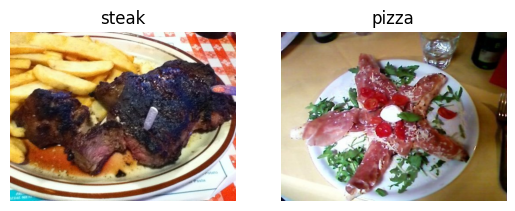

In [ ]:
# Visualize data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_iamge("pizza_steak/train/","steak")
plt.subplot(1,2,2)
steak_img = view_random_iamge("pizza_steak/train/","pizza")

### 2. Preprocess the data

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is small subset of data. Rather than look at all ~10, 000 images at one time, a model might only look at 32 images at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor(GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [ ]:
# Create train and test data generator and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = next(train_data) #get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.427451  , 0.44705886, 0.41960788],
          [0.427451  , 0.44705886, 0.41960788],
          [0.43137258, 0.45882356, 0.427451  ],
          ...,
          [0.36078432, 0.72156864, 0.91372555],
          [0.38823533, 0.7411765 , 0.9450981 ],
          [0.37254903, 0.7254902 , 0.9333334 ]],
 
         [[0.41960788, 0.45098042, 0.40784317],
          [0.42352945, 0.454902  , 0.41176474],
          [0.4039216 , 0.43529415, 0.3921569 ],
          ...,
          [0.35686275, 0.7176471 , 0.909804  ],
          [0.3529412 , 0.7137255 , 0.9058824 ],
          [0.3647059 , 0.74509805, 0.9450981 ]],
 
         [[0.40000004, 0.4431373 , 0.38823533],
          [0.41960788, 0.46274513, 0.40000004],
          [0.41176474, 0.454902  , 0.40000004],
          ...,
          [0.35686275, 0.7176471 , 0.909804  ],
          [0.3372549 , 0.70980394, 0.8980393 ],
          [0.32156864, 0.72156864, 0.909804  ]],
 
         ...,
 
         [[0.7490196 , 0.64705884, 0.35686275],
          [0.75294

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the firts batch of labels
labels

array([0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, #the size of the step the sliding window takes across an input
           padding="valid", #if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)), #input layer (specidy input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") #output layer (working with binary classification so only 1 output neuron)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get the summary of our model
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [ ]:
# check the lengths of training and test data generators
len(train_data),len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, #this is the combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.6154 - loss: 1.2682 - val_accuracy: 0.7460 - val_loss: 0.5271
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.7939 - loss: 0.4528 - val_accuracy: 0.7360 - val_loss: 0.5153
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9050 - loss: 0.2810 - val_accuracy: 0.7060 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9581 - loss: 0.1568 - val_accuracy: 0.7880 - val_loss: 0.5091
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.9876 - loss: 0.0618 - val_accuracy: 0.7720 - val_loss: 0.5772


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it

<Axes: >

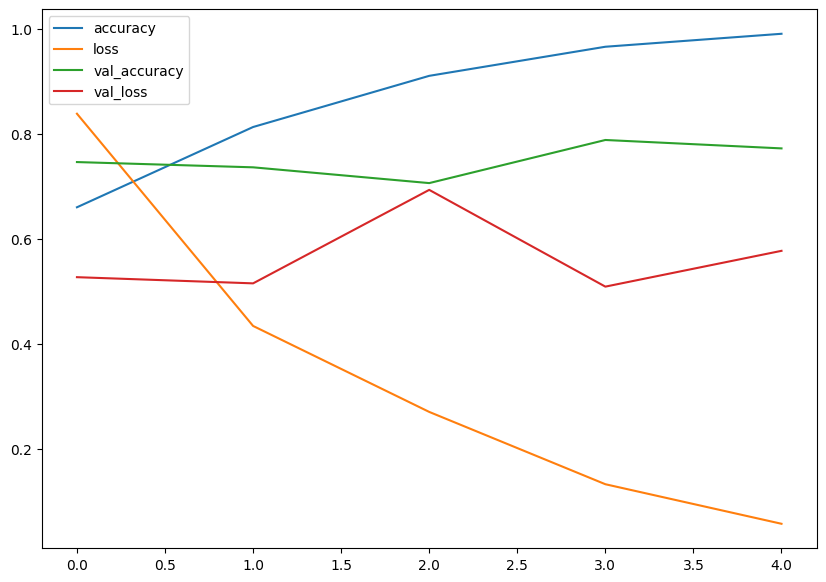

In [ ]:
## Plotting the learning curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [2]:
# Plot he validatipn and training curves separately

def plot_loss_curves(history):
  """
  Returns separates loss curves for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot loss
  plt.figure()
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When a model's **validation loss starts to increase**, it's likely that model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be dimished.

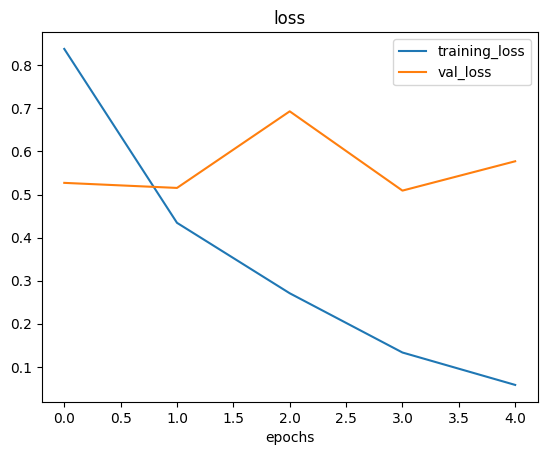

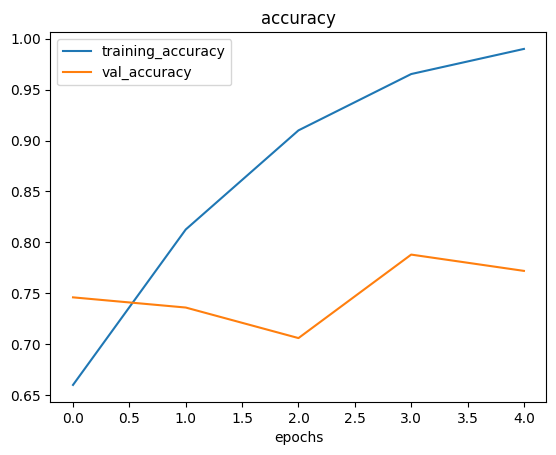

In [ ]:
# check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** Ideally the two curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also known as **regularization**


In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.5849 - loss: 0.6742 - val_accuracy: 0.8200 - val_loss: 0.4399
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.8046 - loss: 0.4460 - val_accuracy: 0.7640 - val_loss: 0.4634
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.8139 - loss: 0.4201 - val_accuracy: 0.8520 - val_loss: 0.3493
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.8427 - loss: 0.3575 - val_accuracy: 0.8620 - val_loss: 0.3233
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.8444 - loss: 0.3767 - val_accuracy: 0.8680 - val_loss: 0.3191


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

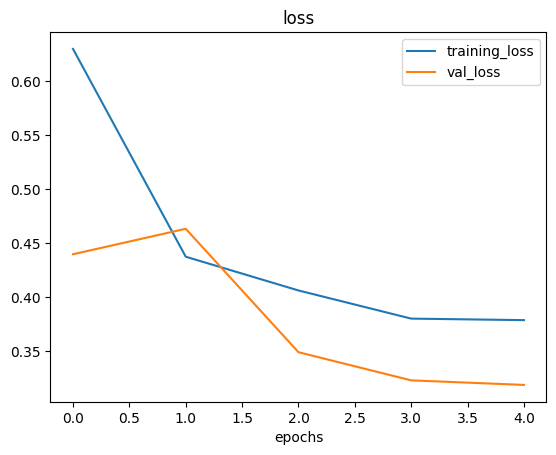

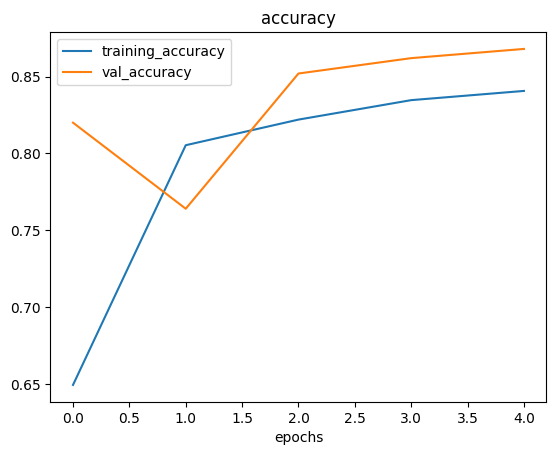

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, #how much do you want to rotate the imaghe?
                                             shear_range=0.2, #how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on a image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.3, #move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmetation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmetation for the test data
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model to learn more generalizable (hopefully) patterns. Altering might mean adjusting the ratotion of an image, flipping it, cropping it or something similar.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) #for demostration purpose only

# Create non_augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

# Create non-aumented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using 'ImageDataGenerator' built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# Get sample data branches
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented) #note: labels aren't augmented... only data (images)

Showing image number: 18


(-0.5, 223.5, 223.5, -0.5)

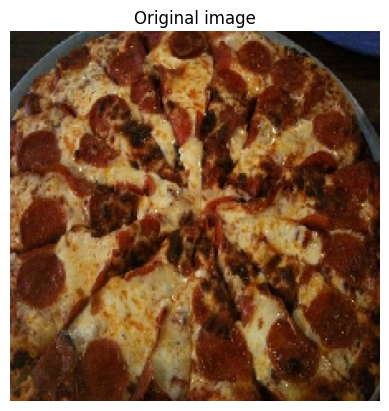

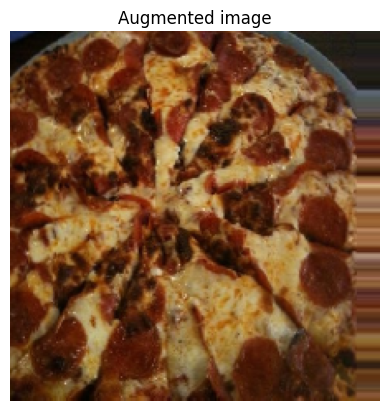

In [ ]:
# Show original image and augmented image

import random

random_number = random.randint(0,32) # our batch sizes are 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)



In [ ]:
# Create a model
model_6 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile the model

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model

history_6= model_6.fit(train_data_augmented,
                      epochs=5,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 425ms/step - accuracy: 0.4997 - loss: 0.7685 - val_accuracy: 0.5960 - val_loss: 0.6858
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 447ms/step - accuracy: 0.4994 - loss: 0.6940 - val_accuracy: 0.5720 - val_loss: 0.6842
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 408ms/step - accuracy: 0.6374 - loss: 0.6791 - val_accuracy: 0.5100 - val_loss: 0.6752
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 454ms/step - accuracy: 0.5076 - loss: 0.6930 - val_accuracy: 0.6680 - val_loss: 0.6659
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 424ms/step - accuracy: 0.5543 - loss: 0.6888 - val_accuracy: 0.7200 - val_loss: 0.6438


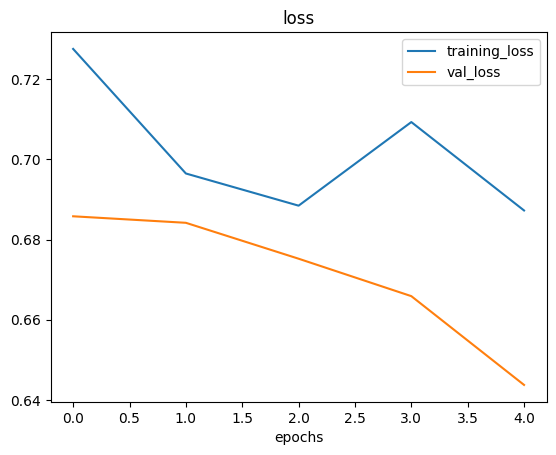

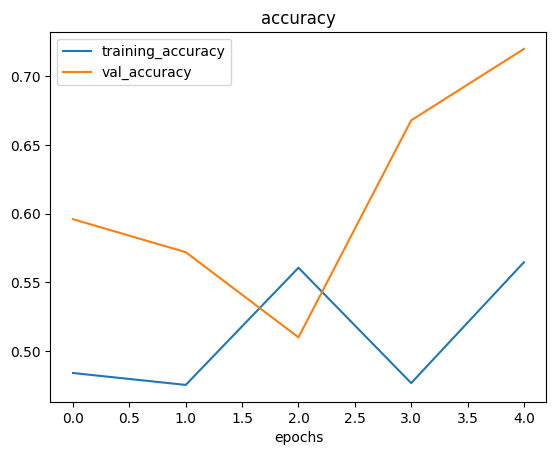

In [ ]:
# Plot the loss curves
plot_loss_curves(history_6)

Let's shuffle our training data and train another model (the same as before) on it and see what happens.

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)

model_7 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model

history_7 = model_7.fit(train_data_augmented_shuffled,
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented_shuffled),
                       validation_data=test_data,
                       validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.5436 - loss: 0.6900 - val_accuracy: 0.6680 - val_loss: 0.6094
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.6979 - loss: 0.5831 - val_accuracy: 0.8240 - val_loss: 0.4149
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7103 - loss: 0.5748 - val_accuracy: 0.8180 - val_loss: 0.3992
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7220 - loss: 0.5410 - val_accuracy: 0.8300 - val_loss: 0.3957
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7420 - loss: 0.5177 - val_accuracy: 0.7800 - val_loss: 0.4665


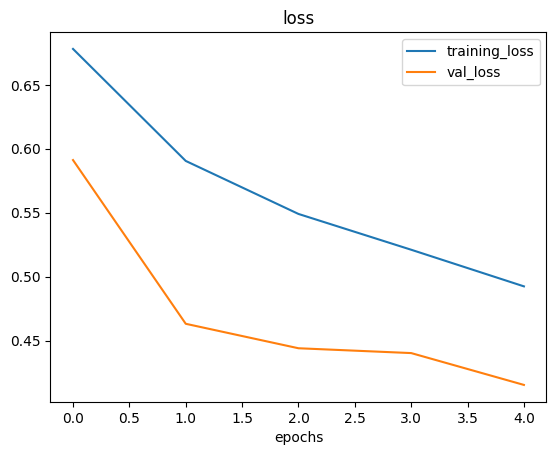

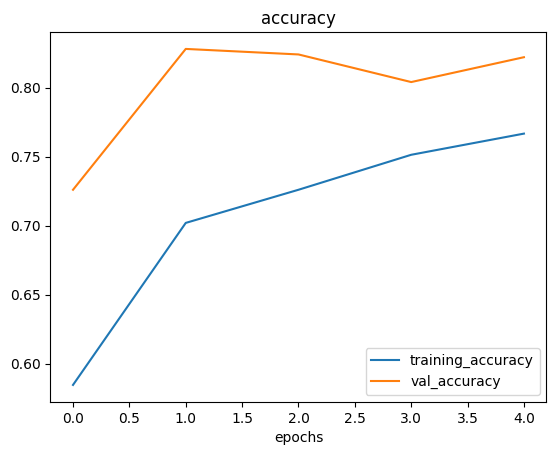

In [ ]:
# Plot the loss curves
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satified

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more "Conv2D" / "MaxPool2D" layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more date (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

In [ ]:
import tensorflow as tf
# Set the seed
tf.random.set_seed(42)

# Preprocess
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


# Import data from directories and turn into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               seed=42)


valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CCN model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.6243 - loss: 0.6409 - val_accuracy: 0.8460 - val_loss: 0.4522
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 207s 4s/step - accuracy: 0.7835 - loss: 0.4569 - val_accuracy: 0.8380 - val_loss: 0.3928
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.8396 - loss: 0.3958 - val_accuracy: 0.8800 - val_loss: 0.3192
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.8750 - loss: 0.3201 - val_accuracy: 0.7440 - val_loss: 0.4951
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 173s 4s/step - accuracy: 0.8073 - loss: 0.4066 - val_accuracy: 0.8800 - val_loss: 0.2881


In [ ]:
# Build a CCN model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_9 = model_9.fit(train_data_augmented_shuffled,
                        epochs=7,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 462ms/step - accuracy: 0.5052 - loss: 0.7202 - val_accuracy: 0.7580 - val_loss: 0.4719
Epoch 2/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.7119 - loss: 0.5454 - val_accuracy: 0.8360 - val_loss: 0.3947
Epoch 3/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 444ms/step - accuracy: 0.7341 - loss: 0.5092 - val_accuracy: 0.8160 - val_loss: 0.4147
Epoch 4/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 436ms/step - accuracy: 0.7833 - loss: 0.4760 - val_accuracy: 0.8480 - val_loss: 0.3333
Epoch 5/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 422ms/step - accuracy: 0.7718 - loss: 0.4886 - val_accuracy: 0.8540 - val_loss: 0.3423
Epoch 6/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 438ms/step - accuracy: 0.7762 - loss: 0.5085 - val_accuracy: 0.8460 - val_loss: 0.3277
Epoch 7/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 436ms/step - accuracy: 0.7876 - loss: 0.4821 - val_accuracy: 0.8860 - val_loss: 0.3026


In [ ]:
# Build a CCN model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_10 = model_10.fit(train_data,
                        epochs=7,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/7


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.6017 - loss: 0.6984 - val_accuracy: 0.8220 - val_loss: 0.4171
Epoch 2/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.8056 - loss: 0.4387 - val_accuracy: 0.8440 - val_loss: 0.3465
Epoch 3/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.8265 - loss: 0.4157 - val_accuracy: 0.8800 - val_loss: 0.3318
Epoch 4/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.8519 - loss: 0.3658 - val_accuracy: 0.8640 - val_loss: 0.3323
Epoch 5/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.8598 - loss: 0.3331 - val_accuracy: 0.8080 - val_loss: 0.4350
Epoch 6/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.8580 - loss: 0.3265 - val_accuracy: 0.8600 - val_loss: 0.3530
Epoch 7/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.8856 - loss: 0.2737 - val_accuracy: 0.8580 - val_loss: 0.3086


## Make a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2025-03-12 17:47:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2025-03-12 17:47:05 (26.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

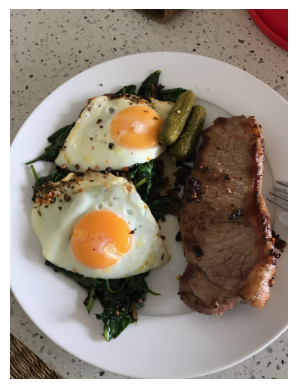

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important tha you custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [34]:
# Create a function to import a image and resize it to be able to used with our model
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape,img_shape,colour_channels)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  #Resize the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
steak_resized = load_and_prep_image("03-steak.jpeg")
steak_resized

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_8.predict(tf.expand_dims(steak_resized,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as model's prediction

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names = class_names):
  """
  Imports and image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction

  pred = model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted class

  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


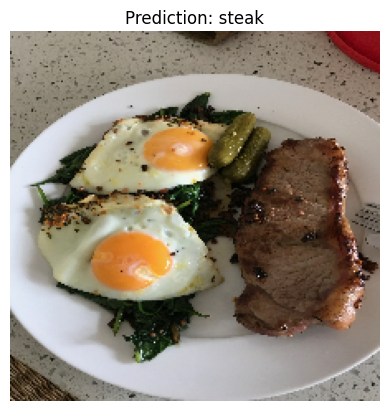

In [ ]:
pred_and_plot(model_8,"03-steak.jpeg")

--2025-03-12 18:40:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2025-03-12 18:40:31 (35.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


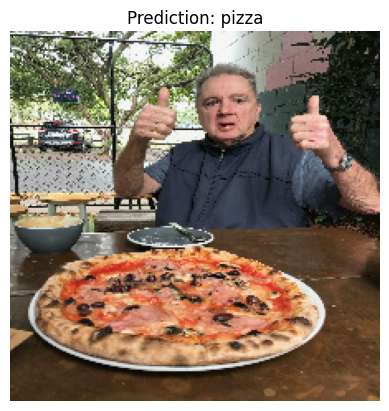

In [ ]:
# Download another test custom image and make prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8,"03-pizza-dad.jpeg")

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overffiting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2025-03-15 17:45:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.207, 172.217.218.207, 142.251.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  42.0MB/s    in 13s     

2025-03-15 17:46:12 (38.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
import os
# Walk through 10 classes of food image data
for dirpath, dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 10 directori

In [5]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2771149.jpg']
Image shape: (512, 512, 3)


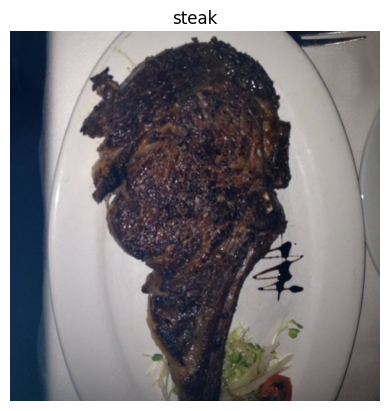

In [7]:
# Visualize

import random

img = view_random_iamge(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for the model)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale

train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_data_gen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_data_gen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [10]:
# Create the model

model_1 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model

model_1.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4. Fit the model

In [12]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 127ms/step - accuracy: 0.1772 - loss: 2.2328 - val_accuracy: 0.2876 - val_loss: 1.9713
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.3277 - loss: 1.9267 - val_accuracy: 0.3148 - val_loss: 1.9184
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.4155 - loss: 1.7255 - val_accuracy: 0.3500 - val_loss: 1.8674
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.5695 - loss: 1.2858 - val_accuracy: 0.3412 - val_loss: 2.0243
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - accuracy: 0.7872 - loss: 0.6964 - val_accuracy: 0.2836 - val_loss: 2.6154


## 5. Evaluate the model

In [13]:
# Evaluate on the test data
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.2869 - loss: 2.5874


[2.6154417991638184, 0.28360000252723694]

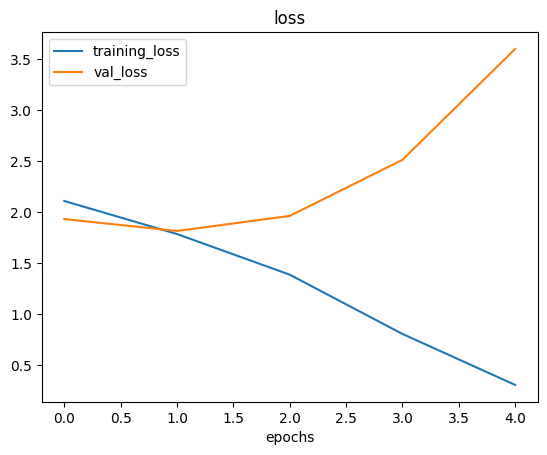

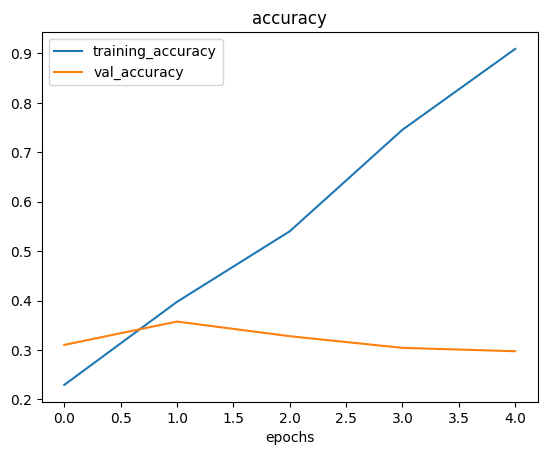

In [ ]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_1)

What do these loss cuerves tell us?

It seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

## Adjust the model hyperparameter (to beat the baseline/reduce the overfitting)

In [14]:
# Create the model

model_2 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model

model_2.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [15]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 113ms/step - accuracy: 0.1991 - loss: 2.2174 - val_accuracy: 0.3256 - val_loss: 1.9283
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.3823 - loss: 1.7889 - val_accuracy: 0.3612 - val_loss: 1.8389
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.5257 - loss: 1.4464 - val_accuracy: 0.3592 - val_loss: 1.8534
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.7005 - loss: 1.0080 - val_accuracy: 0.3304 - val_loss: 2.0380
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.8494 - loss: 0.5711 - val_accuracy: 0.3056 - val_loss: 2.3803


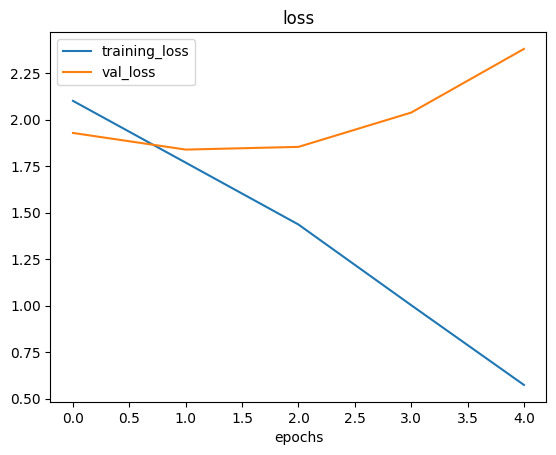

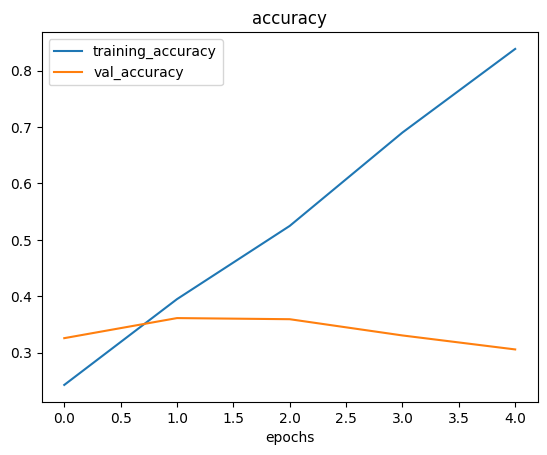

In [16]:
# Check out the loss curves
plot_loss_curves(history_2)

### Try to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy


In [18]:
# Create an augmented data generator instance
train_data_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

train_data_augmented = train_data_augmented.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [21]:
# Let's create another model but this time we'll fill it on the augmented training data of 10 classes
model_3 = tf.keras.models.clone_model(model_1)

# Compile the clone model
model_3.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [26]:
# Fit the model

history_3=model_3.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 100s 426ms/step - accuracy: 0.3181 - loss: 1.9549 - val_accuracy: 0.4052 - val_loss: 1.7595
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 414ms/step - accuracy: 0.3332 - loss: 1.9222 - val_accuracy: 0.4100 - val_loss: 1.7550
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 416ms/step - accuracy: 0.3431 - loss: 1.8895 - val_accuracy: 0.4176 - val_loss: 1.7179
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 417ms/step - accuracy: 0.3642 - loss: 1.8552 - val_accuracy: 0.4068 - val_loss: 1.7197
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 147s 437ms/step - accuracy: 0.3742 - loss: 1.8564 - val_accuracy: 0.4472 - val_loss: 1.6672


In [27]:
model_3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.4559 - loss: 1.6459


[1.6671842336654663, 0.4472000002861023]

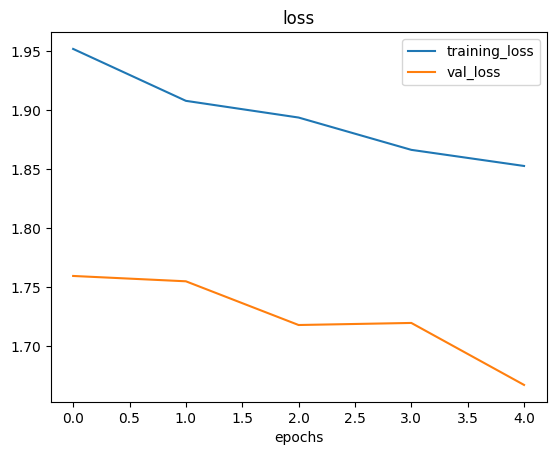

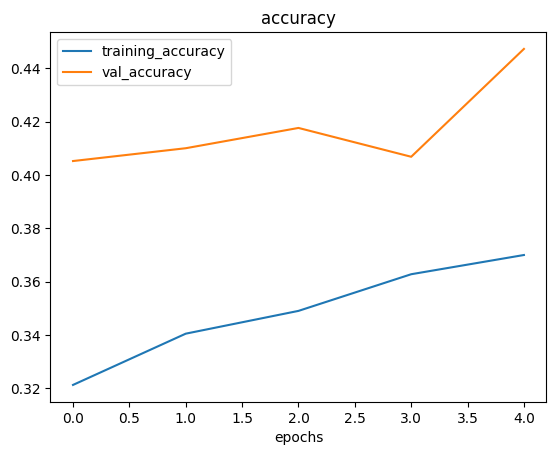

In [28]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_3)

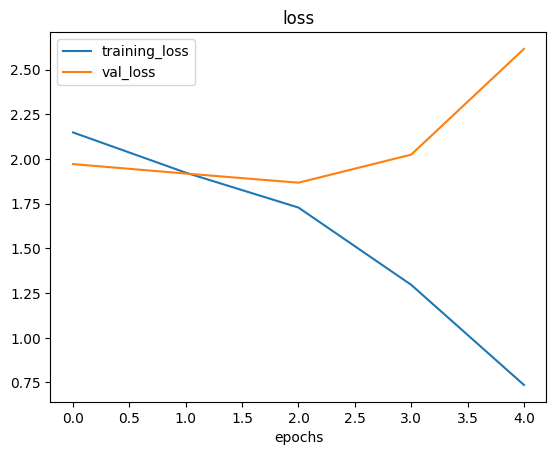

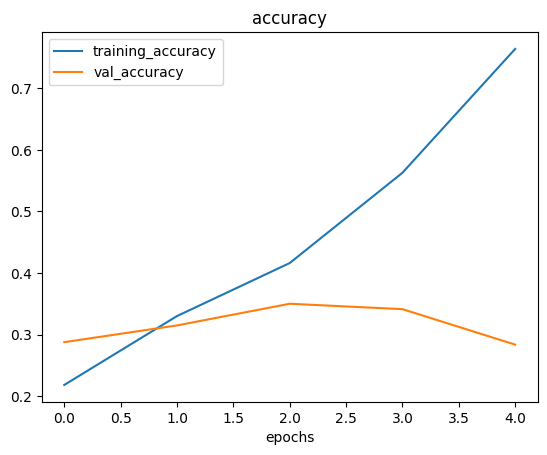

In [30]:
plot_loss_curves(history_1)

## Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters  in our ImageDataGenerator instance)

## Making a prediction with our trained model

In [32]:
# Remind ourselver of the classes our model is trained
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [33]:
# Dowloiad some images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-hamburger.jpeg

--2025-03-15 18:52:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2025-03-15 18:52:09 (72.3 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]

--2025-03-15 18:52:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, aw

In [51]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model,filename,class_names = class_names):
  """
  Imports and image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction

  pred = model.predict(tf.expand_dims(img,axis=0))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


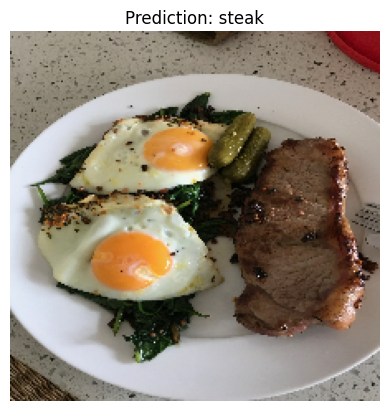

In [52]:
# Make prediction using model_3

pred_and_plot(model=model_3,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


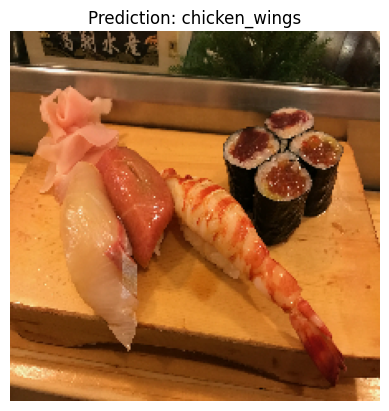

In [54]:
pred_and_plot(model=model_3,
              filename="03-sushi.jpeg",
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


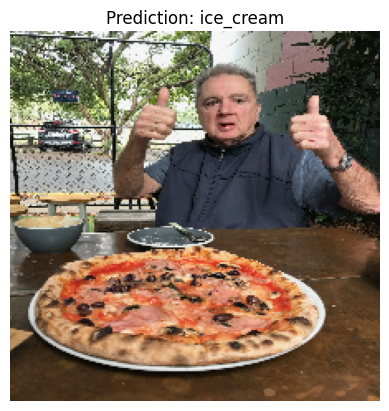

In [55]:
pred_and_plot(model=model_3,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


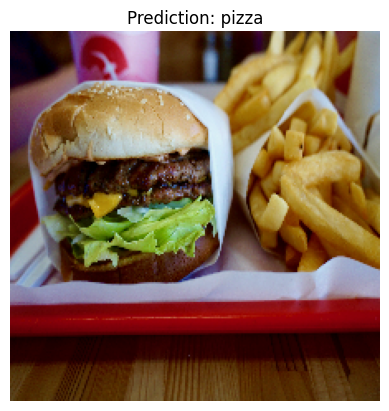

In [56]:
pred_and_plot(model=model_3,
              filename="03-hamburger.jpeg",
              class_names=class_names)

### Undertanding the dimensionality of the vectors

In [53]:
filename="03-sushi.jpeg"
img = load_and_prep_image(filename)
pred = model_3.predict(tf.expand_dims(img,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [38]:
pred

array([[0.0482821 , 0.07630473, 0.01045112, 0.1382331 , 0.08651652,
        0.06314206, 0.04342741, 0.04741265, 0.42647526, 0.05975506]],
      dtype=float32)

In [41]:
pred.shape

(1, 10)

In [45]:
pred[0].shape

(10,)

In [46]:
pred.ndim

2

In [47]:
pred[0].ndim

1

## Saving our model

In [57]:
# Save a model
model_3.save('saved_trained_model_3.keras')

In [58]:
# Load in a trained model and evaluate it
loaded_model_3 = tf.keras.models.load_model('saved_trained_model_3.keras')
loaded_model_3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.4549 - loss: 1.6492


[1.667184591293335, 0.4472000002861023]

In [59]:
# Compare our loaded  model to our existing model
model_3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.4505 - loss: 1.6422


[1.6671843528747559, 0.4472000002861023]